<a href="https://colab.research.google.com/github/jayeshmkoli/Cement-strength-Prediction/blob/main/TeleMarketing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TeleMarketing prediction using Machine learning


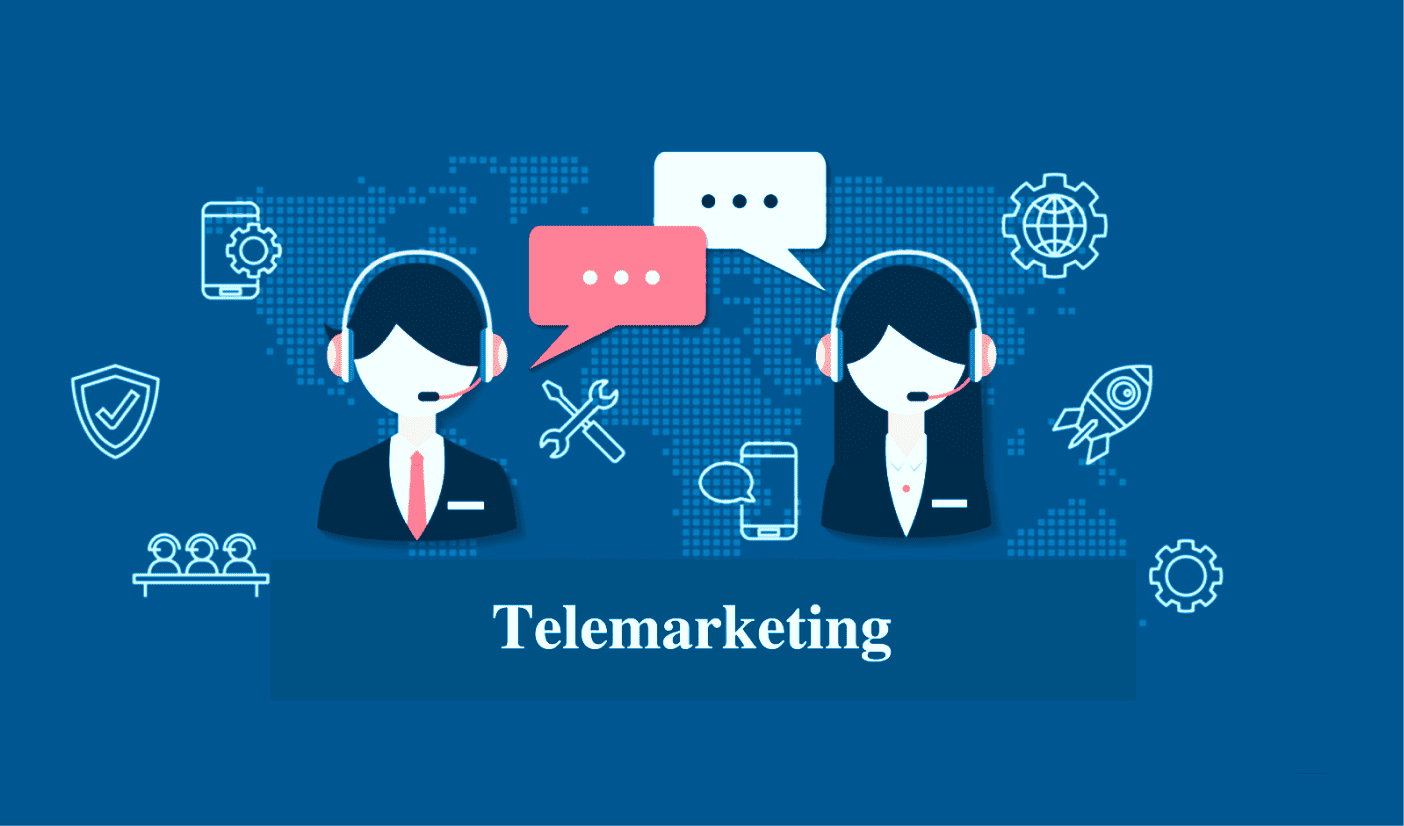![telemarketing.png](attachment:telemarketing.png)

In [1]:
# Import Data Manimpulation Library
import numpy as np
import pandas as pd
# Import Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
# Import FilterWarning Library
import warnings
warnings.filterwarnings('ignore')
# Import Sci-Kit Learn Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# **Data Uploading**

In [2]:
url = 'https://raw.githubusercontent.com/chandanc5525/MachineLearning-Bootcamp/refs/heads/main/bank-additional-full.csv'

df = pd.read_csv(url,sep = ';')   # Important Step
df.sample(frac = 1)   # Shuffle Dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
33094,40,blue-collar,married,basic.4y,no,yes,yes,cellular,may,tue,...,2,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,no
16856,49,technician,married,professional.course,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
26923,41,services,married,professional.course,no,no,yes,cellular,nov,thu,...,3,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
29263,75,housemaid,divorced,basic.4y,no,no,no,cellular,apr,fri,...,4,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
4413,32,technician,divorced,high.school,no,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12759,42,unemployed,married,university.degree,unknown,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
19284,51,technician,married,professional.course,no,no,no,cellular,aug,wed,...,9,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,no
17341,40,admin.,divorced,high.school,no,yes,yes,cellular,jul,mon,...,10,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
27877,27,unemployed,single,university.degree,no,yes,no,cellular,mar,mon,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.560,5099.1,no


# **Data Attributes**

In [3]:
# Chekcing Information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

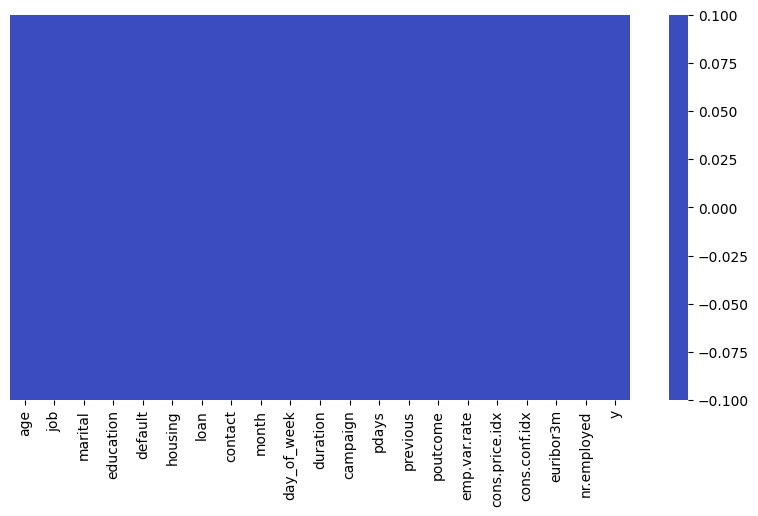

In [4]:
# By Visualization Checking if any null value present or not
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(),cmap='coolwarm',center = 0,yticklabels=False)
plt.show()

In [5]:
# Checking Dataset:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2309,45,services,married,high.school,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
16680,30,blue-collar,married,basic.6y,no,yes,yes,telephone,jul,wed,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
15432,42,admin.,married,university.degree,no,no,no,cellular,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
13395,30,technician,single,university.degree,no,no,no,telephone,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16006,28,technician,married,professional.course,no,no,no,cellular,jul,tue,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


In [6]:
# Divide Dataset into Categorical and Numerical:

numerical_data = df.select_dtypes(exclude = 'object')
categorical_data = df.select_dtypes(include = 'object')

In [7]:
categorical_data.sample(5)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
8537,admin.,married,university.degree,no,no,no,telephone,jun,wed,nonexistent,no
1232,blue-collar,married,basic.6y,unknown,no,yes,telephone,may,thu,nonexistent,no
8956,blue-collar,married,basic.4y,unknown,yes,no,telephone,jun,thu,nonexistent,no
21392,technician,single,university.degree,no,no,no,cellular,aug,tue,nonexistent,no
26608,services,married,high.school,no,yes,no,cellular,nov,thu,nonexistent,no


In [8]:
numerical_data.sample(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
17197,55,106,3,999,0,1.4,93.918,-42.7,4.962,5228.1
23668,48,13,14,999,0,1.4,93.444,-36.1,4.962,5228.1
10357,27,209,12,999,0,1.4,94.465,-41.8,4.960,5228.1
28702,51,150,1,999,0,-1.8,93.075,-47.1,1.410,5099.1
20901,41,107,1,999,0,1.4,93.444,-36.1,4.964,5228.1


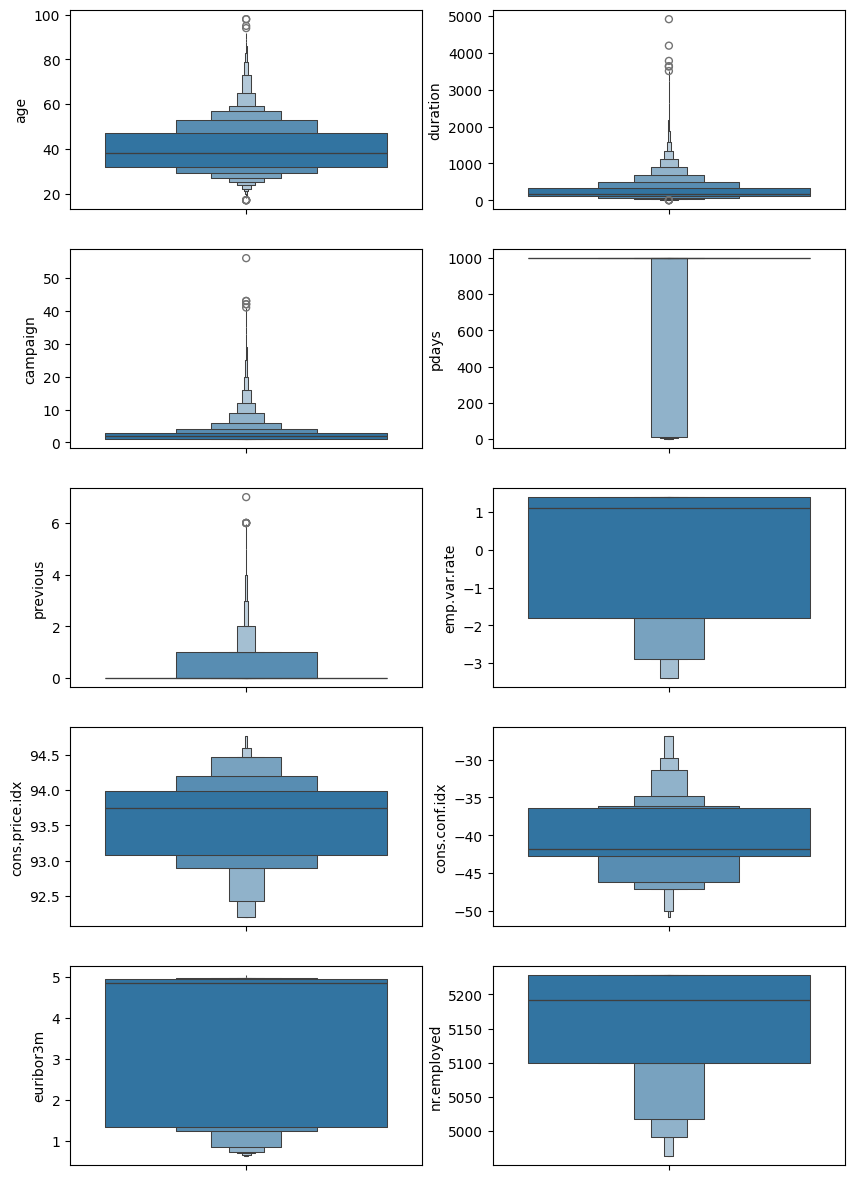

In [9]:
plt.figure(figsize = (10,15))
plt.tight_layout()
plot = 0

for i in numerical_data.columns:
  plot = plot + 1
  plt.subplot(5,2,plot)
  sns.boxenplot(df[i])
plt.show()

In [10]:
for i in categorical_data.columns:
    print(categorical_data[i].value_counts())
    print('*'*20)

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
********************
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
********************
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
********************
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
********************
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
********************
loan
no         33950
yes         6248
unknow

In [11]:
df['y'].replace({'yes':1,'no':0},inplace = True)

In [12]:
categorical_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
df['job'] = LabelEncoder().fit_transform(df['job'])
df['marital'] = LabelEncoder().fit_transform(df['marital'])
df['education'] = LabelEncoder().fit_transform(df['education'])
df['default'] = LabelEncoder().fit_transform(df['default'])
df['housing'] = LabelEncoder().fit_transform(df['housing'])
df['loan'] = LabelEncoder().fit_transform(df['loan'])
df['contact'] = LabelEncoder().fit_transform(df['contact'])
df['month'] = LabelEncoder().fit_transform(df['month'])
df['day_of_week'] = LabelEncoder().fit_transform(df['day_of_week'])
df['poutcome'] = LabelEncoder().fit_transform(df['poutcome'])

In [14]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
28929,35,9,1,5,0,2,0,0,0,0,...,1,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
9727,25,9,2,6,0,0,0,1,4,1,...,6,999,0,1,1.4,94.465,-41.8,4.961,5228.1,0
18595,39,9,1,3,0,0,0,0,3,2,...,9,999,0,1,1.4,93.918,-42.7,4.968,5228.1,0
4153,60,0,1,5,0,2,0,1,6,1,...,2,999,0,1,1.1,93.994,-36.4,4.858,5191.0,0
10036,43,9,1,5,0,0,0,1,4,2,...,2,999,0,1,1.4,94.465,-41.8,4.958,5228.1,0


<Axes: xlabel='y'>

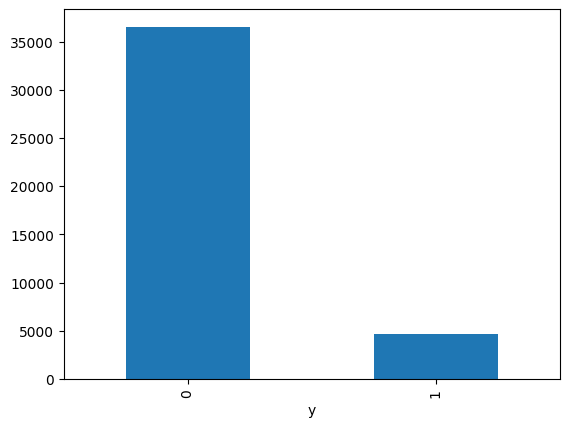

In [15]:
df['y'].value_counts().plot(kind = 'bar')

In [16]:
# Split the Dataset into Train and Test
X = df.drop(columns = ['y'], axis = 1)
y = df['y']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,
                                                 random_state = 42)

In [18]:
# Use Scaling Technique
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train.max(),X_train.min()

(1.0, 0.0)

In [20]:
# Use Balance Dataset Technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train,y_train = smote.fit_resample(X_train,y_train)

# **Random Forest Prediction Model**

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

print(accuracy_score(y_test,y_pred_rf))

0.9075827466213482


In [22]:
X.shape

(41188, 20)

# **ANN Model Building**

In [23]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [24]:
ann_model = Sequential()

ann_model.add(Dense(128,activation = 'relu',input_dim = 20))
ann_model.add(Dense(64,activation = 'relu'))
ann_model.add(Dense(32,activation = 'relu'))
ann_model.add(Dense(16,activation = 'relu'))
ann_model.add(Dense(1,activation = 'sigmoid'))

In [25]:
ann_model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [26]:
ann_model.fit(X_train,y_train,epochs = 100,batch_size = 32,
              validation_split = 0.3)

Epoch 1/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8166 - loss: 0.4103 - val_accuracy: 0.8889 - val_loss: 0.3838
Epoch 2/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8709 - loss: 0.2853 - val_accuracy: 0.9006 - val_loss: 0.3373
Epoch 3/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8744 - loss: 0.2748 - val_accuracy: 0.7799 - val_loss: 0.5545
Epoch 4/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8837 - loss: 0.2587 - val_accuracy: 0.8315 - val_loss: 0.4371
Epoch 5/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8829 - loss: 0.2592 - val_accuracy: 0.8784 - val_loss: 0.3831
Epoch 6/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8851 - loss: 0.2504 - val_accuracy: 0.8709 - val_loss: 0.3846
Epoch 7/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8884 - loss: 0.2465 - val_accuracy: 0.9023 - val_loss: 0.3499
Epoch 8/100
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8930 - loss: 0

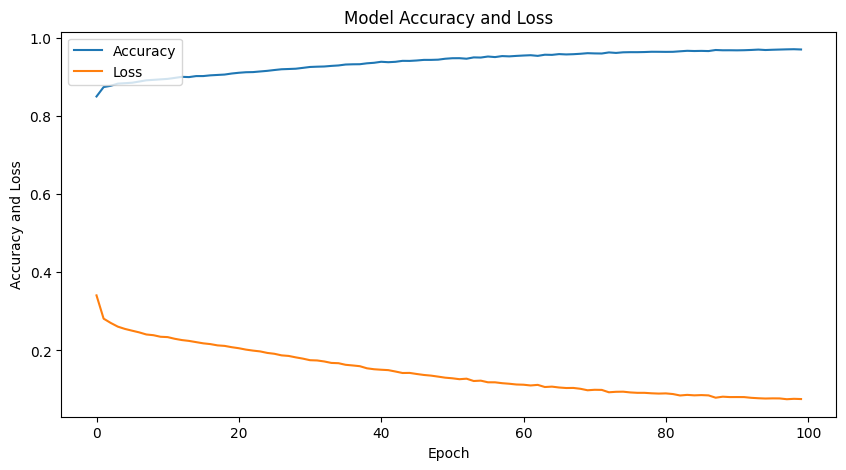

In [27]:
model_history = ann_model.history.history

plt.figure(figsize = (10,5))
plt.plot(model_history['accuracy'])
plt.plot(model_history['loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'],loc = 'upper left')
plt.show()

In [28]:
y_pred_ann = ann_model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5,1,0)
print('Accuracy Score :',accuracy_score(y_test,y_pred_ann))

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy Score : 0.8887270373067897


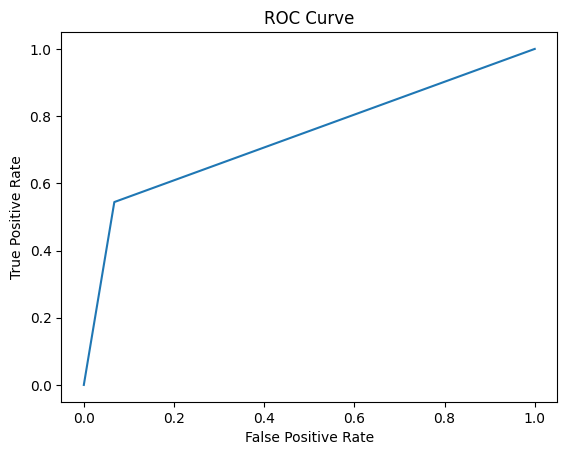

In [29]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,thresholds = roc_curve(y_test,y_pred_ann)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()